In [ ]:
# Read file

file = open('/Users/samzavislan-pullaro/Desktop/p53.txt', 'r')

# check for fasta format

print(file.read())

>NP_000537.3 cellular tumor antigen p53 isoform a [Homo sapiens]
MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLSPDDIEQWFTEDPGPDEAPRMPEAAPPVAPAPAAP
TPAAPAPAPSWPLSSSVPSQKTYQGSYGFRLGFLHSGTAKSVTCTYSPALNKMFCQLAKTCPVQLWVDSTPPPGTRVRAM
AIYKQSQHMTEVVRRCPHHERCSDSDGLAPPQHLIRVEGNLRVEYLDDRNTFRHSVVVPYEPPEVGSDCTTIHYNYMCNS
SCMGGMNRRPILTIITLEDSSGNLLGRNSFEVRVCACPGRDRRTEEENLRKKGEPHHELPPGSTKRALPNNTSSSPQPKK
KPLDGEYFTLQIRGRERFEMFRELNEALELKDAQAGKEPGGSRAHSSHLKSKKGQSTSRHKKLMFKTEGPDSD
>AYE20617.1 mutant tumor protein p53 [Homo sapiens]
MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLSPDDIEQWFTEDPGPDEAPRMPEAAPPVAPAPAAP
TPAAPAPAPSWPLSSSVPSQKTYQGSYGFRLGFLHSGTAKSVTCTYSPALNKMFCQLAKTCPVQLWVDSTPPPGTRVRAM
AIYKQSQHMTEVVRRCPHHERCSDSDGLAPPQHLIRVEGNLRVEYLDDRNTFQHSVVVPYEPPEVGSDCTTIHYNYMCNS
SCMGGMNRRPILTIITLEDSSGNLLGRNSFEVRVCACPGRDRRTEEENLRKKGEPHHELPPGSTKRALPNNTSSSPQPKK
KPLDGEYFTLQIRGRERFEMFRELNEALELKDAQAGKEPGGSRAHSSHLKSKKGQSTSRHKKLMFKTEGPDSD
>XP_002827020.3 cellular tumor antigen p53 [Pongo abelii]
MEEPQSDPSVEPPLSQETFSDLWKLLPEN

In [ ]:
from Bio import AlignIO

align = AlignIO.read('/Users/samzavislan-pullaro/Desktop/p53.txt', 'fasta')

print(align)

Alignment with 6 rows and 393 columns
MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLM...DSD NP_000537.3
MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLM...DSD AYE20617.1
MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAVDDLL...DSD XP_002827020.3
MEEPQSDPSIEPPLSQETFSDLWKLLPENNVLSPLPSQAVDDLM...DSD XP_010360689.1
MEEPQSDPSIEPPLSQETFSDLWKLLPENNVLSPLPSQAVDDLM...DSD KAL4834397.1
MEEPQSDPSIEPPLSQETFSDLWKLLPENHVLSPLPSQAVDDLM...DSD AAB91535.1


In [ ]:
clustal_alignment = format(align, 'clustal')

print(clustal_alignment)

CLUSTAL X (1.81) multiple sequence alignment


NP_000537.3                         MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLSPDDI
AYE20617.1                          MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLSPDDI
XP_002827020.3                      MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAVDDLLLSPDDI
XP_010360689.1                      MEEPQSDPSIEPPLSQETFSDLWKLLPENNVLSPLPSQAVDDLMLSPDDL
KAL4834397.1                        MEEPQSDPSIEPPLSQETFSDLWKLLPENNVLSPLPSQAVDDLMLSPDDF
AAB91535.1                          MEEPQSDPSIEPPLSQETFSDLWKLLPENHVLSPLPSQAVDDLMLSPDDL

NP_000537.3                         EQWFTEDPGPDEAPRMPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQ
AYE20617.1                          EQWFTEDPGPDEAPRMPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQ
XP_002827020.3                      AQWFIEDPGPDEAPRMSEAASPVGPAPAAPIPAAPAPAPSWPLSSSVPSQ
XP_010360689.1                      AQWLTEDPGPDEAPRMSEAAPPMAPTPAAPTPAAPAPAPSWPLSSSVPSQ
KAL4834397.1                        AQWLTEDPGPDEAPRMSEAAPPMAPTPAAPTPAAPAPAPSWPLSSS

In [ ]:
from Bio.Phylo.TreeConstruction import DistanceCalculator

calculator = DistanceCalculator('identity')

# Calculate the distance matrix
distance_matrix = calculator.get_distance(align)

print(distance_matrix)


NP_000537.3 0.000000
AYE20617.1  0.002545    0.000000
XP_002827020.3  0.022901    0.025445    0.000000
XP_010360689.1  0.038168    0.040712    0.043257    0.000000
KAL4834397.1    0.038168    0.040712    0.040712    0.005089    0.000000
AAB91535.1  0.045802    0.048346    0.048346    0.010178    0.010178    0.000000
    NP_000537.3 AYE20617.1  XP_002827020.3  XP_010360689.1  KAL4834397.1    AAB91535.1


In [ ]:
# extract species name from fasta file
import re

P53seq = '/Users/samzavislan-pullaro/P53-Alignment/P53-Alignment/p53.txt'

def extract_species_from_fasta(p53seq):
    species_names = []
    
    species_pattern = r'\[([A-Za-z\s]+)\]'

    with open(p53seq, 'r') as file:
        for line in file:
            if line.startswith('>'):
                match = re.search(species_pattern, line)
                if match:
                    species_names.append(match.group(1))

    return species_names

species = extract_species_from_fasta(P53seq)

print(species)

['Homo sapiens', 'Homo sapiens', 'Pongo abelii', 'Rhinopithecus roxellana', 'Nasalis larvatus', 'Macaca fascicularis']


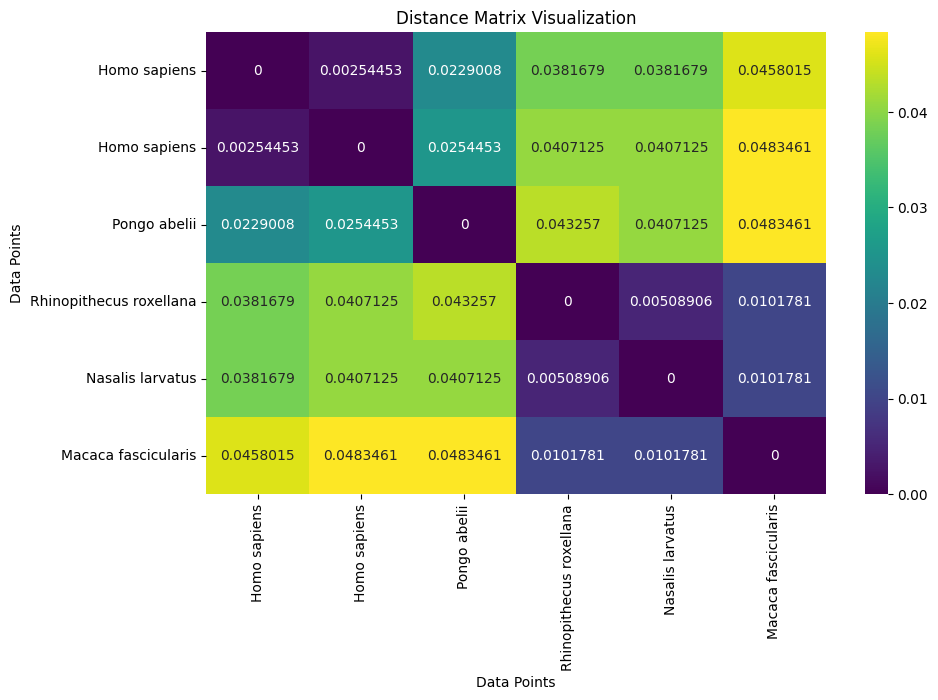

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

x_labels = species
y_labels = species
# Create a heatmap of distance matrix 
plt.figure(figsize=(10, 6))  
sns.heatmap(distance_matrix, xticklabels= x_labels, yticklabels= y_labels, annot=True, cmap='viridis', fmt='g')

# labels and title
plt.title('Distance Matrix Visualization')
plt.xlabel('Species')
plt.ylabel('Species')

# Show plot
plt.show()